In [80]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
from scipy.signal import find_peaks

In [81]:
from astropy.io import fits
fitsfile = fits.open("Near-Infrared.fits")

In [82]:
img = (fitsfile)[0].data
img_2D = (img)[0]

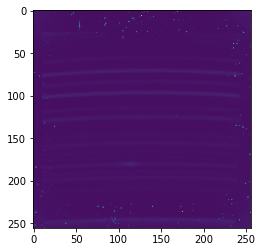

In [83]:
plt.imshow(img_2D)

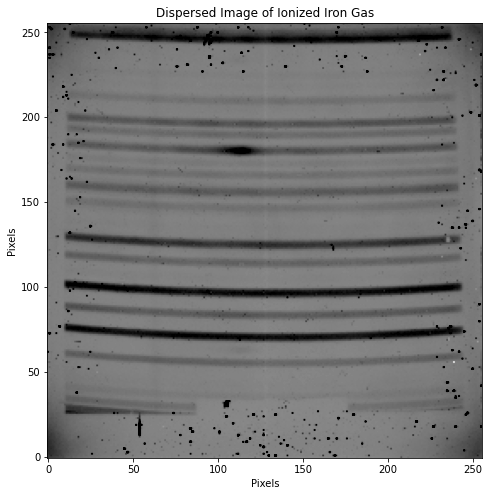

In [84]:
plt.figure(figsize=(8, 8))
plt.imshow(img_2D, origin='lower', vmax=np.percentile(img_2D, 99), cmap="binary")
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Dispersed Image of Ionized Iron Gas')
plt.show()

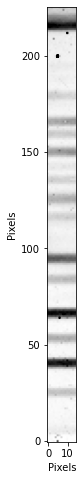

In [85]:
plt.figure(figsize=(8, 8))
plt.imshow(img_2D[30:256,135:150], origin='lower', vmax=np.percentile(img_2D, 99), cmap="binary")
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()
plt.show()

Text(0.5, 1.0, 'OH Sky Lines: Pixel VS Intensity')

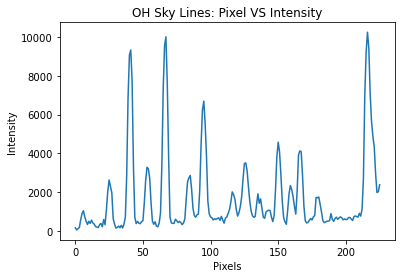

In [86]:
snippet = img_2D[30:256,149:150]
plt.plot(snippet)
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('OH Sky Lines: Pixel VS Intensity')

In [87]:
newsnip = np.reshape(snippet, (226))

The intensities of the gas lines = [ 2639  9322  3290  9999  2873  6691  2025  3518  1927  4583  2353  4137
  1747  1766 10232]
Centroid (pixel positions) = [ 25  41  53  67  85  95 116 126 135 150 159 166 178 180 216]
15


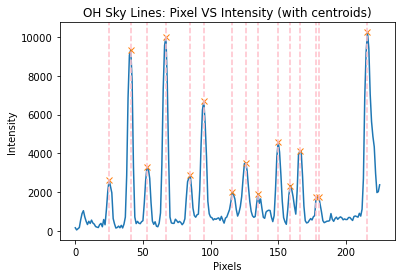

In [88]:
fe_dataset = pd.DataFrame({'Intensity': newsnip})
fe_dataset.index = np.arange(1, len(fe_dataset)+1)
x = np.array(fe_dataset.index)

peaks, _ = find_peaks(newsnip, height = 1700)
plt.plot(newsnip)
plt.plot(peaks, newsnip[peaks], "x")
[plt.axvline(lines, ls = '--', color = 'pink') for lines in peaks]

plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('OH Sky Lines: Pixel VS Intensity (with centroids)')
print('The intensities of the gas lines =', newsnip[peaks])
print('Centroid (pixel positions) =', peaks)

print(len(peaks))

In [170]:
# Now we have acquired x, y values from the plot
# where the x = peak's centroids, and y = wavelengths (as taken from figures 7,8 from the lab manual by checking corresponding
# peak shapes)

x1 = np.array([41, 53, 67, 85, 95, 116, 126, 135, 150, 159, 216]) # centroids
y1 = np.array([16128.608, 16194.615, 16235.376, 16317.161, 16350.650, 16414.737, 16442.155, 16475.648, 16502.365, 16553.814, 16692.380])
# wavelengths

# Checking lengths
print('Number of centroid datapoints:',len(x1))
print('Number of wavelength datapoints:', len(y1))

# Checking (x,y) outputs
print('Centroids (pixel positions) =', x1)
print('Wavelengths =', y1)

Number of centroid datapoints: 11
Number of wavelength datapoints: 11
Centroids (pixel positions) = [ 41  53  67  85  95 116 126 135 150 159 216]
Wavelengths = [16128.608 16194.615 16235.376 16317.161 16350.65  16414.737 16442.155
 16475.648 16502.365 16553.814 16692.38 ]


[3.20872775e+00 1.60290055e+04]
[[ 3.73636445e-05 -4.22209168e-03]
 [-4.22209168e-03  5.68005435e-01]]
[0.00611258 0.75366135]


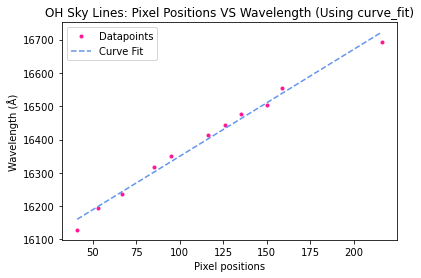

In [108]:
# Linear Fitting: Degree 1 (Linear) 
# Using curve_fit

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='deeppink')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using curve_fit)')

# Curve fitting
# Equations:
def linear(slope, x_val, y_int):
    return (slope*x_val)+y_int

# Curve Fitting 
popt, pcov = curve_fit(linear, x1, y1, absolute_sigma=True)
pstd = np.sqrt(np.diag(pcov))

print(popt)
print(pcov)
print(pstd)
plt.plot(x1, linear(x1, popt[0], popt[1]), '--', color='cornflowerblue', label='Curve Fit')
plt.legend()

3.208727806008028
16029.005485193818


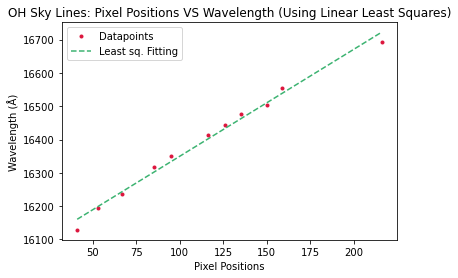

In [109]:
# Line Fitting: Degree 1 (Using Linear Least Squares Method)

plt.plot(x1, y1, '.', color = 'crimson',label = 'Datapoints')
plt.xlabel('Pixel Positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using Linear Least Squares)')
n = len(y1)

# Matrices
ma = np.array([[np.sum(x1**2), np.sum(x1)], [np.sum(x1), n]])
mc = np.array([[np.sum(x1*y1)], [np.sum(y1)]])

#Gradient and Intercept
mainv = np.linalg.inv(ma)

equation = np.dot(mainv, mc) #multiplying matrices

#Plotting best fit over the datapoints
m_fit = equation[0,0]
c_fit = equation[1,0]
print(m_fit)
print(c_fit)

plt.plot(x1, m_fit*x1 + c_fit, '--', color = 'mediumseagreen', label='Least sq. Fitting')
plt.legend()


Coefficients: [3.20872781e+00 1.60290055e+04]
Uncertainty: [ 0.11593465 14.29436622]


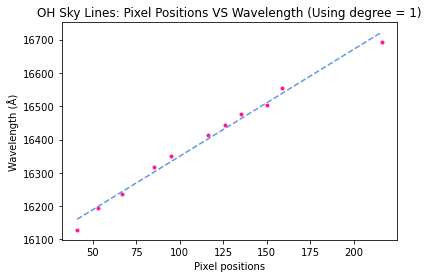

In [172]:
# Line Fitting: Degree 1 (Linear)

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='deeppink')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using degree = 1)')

deg1, cov1 = np.polyfit(x1, y1, 1, cov = True)
plt.plot(x1, np.polyval(deg1, x1), '--', color = 'cornflowerblue')

unc1 = np.sqrt(np.diag(cov1))

print('Coefficients:', deg1)
print ('Uncertainty:', np.sqrt(np.diag(cov1)))

In [174]:
#Max and min (Deg 1)

#Max wavelength
sol1max = (deg1[0]+unc1[0])*x1+(deg1[1]+unc1[1])
print(sol1max)

#Min wavelength
sol1min = (deg1[0]-unc1[0])*x1+(deg1[1]-unc1[1])
print(sol1min)

[16179.61101196 16219.50696139 16266.05223573 16325.89615987
 16359.14278439 16428.96069589 16462.20732042 16492.12928249
 16541.99921928 16571.92118135 16761.42694114]
[16141.51563852 16178.62915643 16221.92826067 16277.59853754
 16308.52646914 16373.47512549 16404.40305708 16432.23819552
 16478.63009291 16506.46523135 16682.75444145]


Coefficients: [-5.32113430e-03  4.51851018e+00  1.59618924e+04]
Uncertainty: [1.02391428e-03 2.58798096e-01 1.48089969e+01]


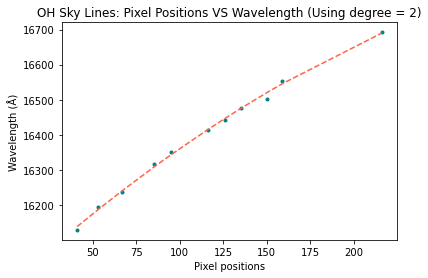

In [175]:
# Line Fitting: Degree 2 (Quadratic)

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='teal')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using degree = 2)')

deg2, cov2 = np.polyfit(x1, y1, 2, cov = True)
plt.plot(x1, np.polyval(deg2, x1), '--', color = 'tomato')

unc2 = np.sqrt(np.diag(cov2))

print('Coefficients:', deg2)
print ('Uncertainty:', np.sqrt(np.diag(cov2)))

In [177]:
#Max and min (Deg 2)

#Max wavelength
sol2max = (deg2[0]+unc2[0])*(x1**2)+(deg2[1]+unc2[1])*x1+(deg2[2]+unc2[2]) 
print(sol2max)

#Min wavelength
sol2min = (deg2[0]-unc2[0])*(x1**2)+(deg2[1]-unc2[1])*x1+(deg2[2]-unc2[2]) 
print(sol2min)

[16165.34745355 16217.82788871 16277.49087497 16351.72523001
 16391.76331676 16473.04580872 16510.41961906 16543.32122375
 16596.61023236 16627.655438   16808.10893204]
[16111.065616   16155.02494623 16204.00123381 16263.31599842
 16294.49203183 16355.83107536 16383.07317865 16406.5060683
 16443.2766669  16463.96849556 16571.14667101]


Coefficients: [ 3.16382424e-05 -1.75944303e-02  5.91739577e+00  1.59171007e+04]
Uncertainty: [2.30043339e-05 8.97667415e-03 1.04634081e+00 3.54684681e+01]


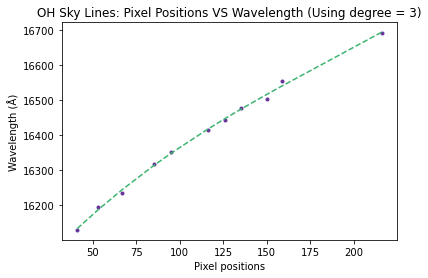

In [182]:
# Line Fitting: Degree 3 (Cubic)

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='rebeccapurple')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using degree = 3)')

deg3, cov3 = np.polyfit(x1, y1, 3, cov = True)
plt.plot(x1, np.polyval(deg3, x1), '--', color = 'mediumseagreen')

unc3 = np.sqrt(np.diag(cov3))

print('Coefficients:', deg3)
print ('Uncertainty:', np.sqrt(np.diag(cov3)))

In [184]:
#Max and min (Deg 3)

#Max wavelength
sol3max = (deg3[0]+unc3[0])*(x1**3)+(deg3[1]+unc3[1])*(x1**2)+(deg3[2]+unc3[2])*x1+(deg3[3]+unc3[3]) 
print(sol3max)

#Min wavelength
sol3min = (deg3[0]-unc3[0])*(x1**3)+(deg3[1]-unc3[1])*(x1**2)+(deg3[2]-unc3[2])*x1+(deg3[3]-unc3[3]) 
print(sol3min)

[16227.36195729 16305.57496913 16396.88889324 16515.7808778
 16583.19808919 16729.69347971 16802.49019502 16870.05624545
 16987.64885287 17061.58342362 17605.33752661]
[16037.27453288 16066.44531939 16091.3120032  16108.99798956
 16111.98074939 16102.61047567 16090.8133826  16076.20894215
 16043.58008355 16019.09143619 15781.08857551]


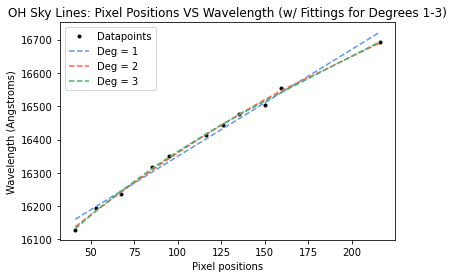

In [151]:
# Plotting all 3 fittings together:

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='black')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Angstroms)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (w/ Fittings for Degrees 1-3)')

plt.plot(x1, linear(x1, popt[0], popt[1]), '--', color='cornflowerblue', label='Deg = 1')
plt.plot(x1, np.polyval(deg2, x1), '--', color = 'tomato', label = 'Deg = 2')
plt.plot(x1, np.polyval(deg3, x1), '--', color = 'mediumseagreen', label = 'Deg = 3')
plt.legend()

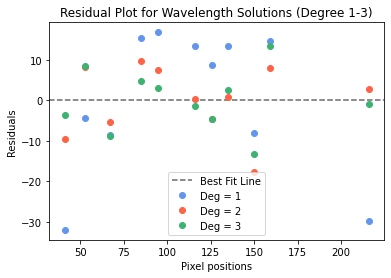

In [152]:
# Making a residual plot to compare the 3 different fittings:

plt.axhline(y = 0, ls = '--', color = 'dimgrey', label = 'Best Fit Line')
fig = plt.gcf()

#Degree 1
res1 = y1 - np.array(deg1[0]*x1+deg1[1])
plt.plot(x1, res1, 'o', color = 'cornflowerblue', label = 'Deg = 1')

#Degree 2
res2 = y1 - np.array((deg2[0])*x1**2 + (deg2[1])*x1 + deg2[2])
plt.plot(x1, res2, 'o', color = 'tomato', label = 'Deg = 2')

#Degree 3
res3 = y1 - np.array((deg3[0])*x1**3 + (deg3[1])*x1**2 + (deg3[2])*x1 + deg3[3])
plt.plot(x1, res3, 'o', color = 'mediumseagreen', label = 'Deg = 3')

#Plotting
plt.xlabel('Pixel positions')
plt.ylabel('Residuals')
plt.title('Residual Plot for Wavelength Solutions (Degree 1-3)')
plt.legend()

[-5.32113430e-03  4.51851018e+00  1.59618924e+04]
[[ 1.13361814e-08 -2.79036892e-06  1.42978046e-04]
 [-2.79036892e-06  7.24205022e-04 -3.94157299e-02]
 [ 1.42978046e-04 -3.94157299e-02  2.37132154e+00]]
[1.06471505e-04 2.69110576e-02 1.53990959e+00]


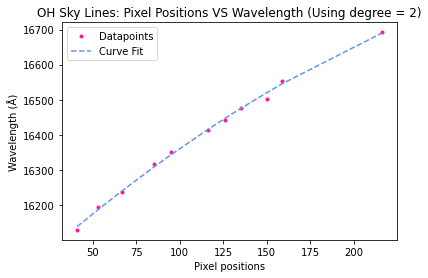

In [153]:
# Line Fitting: Degree 2 (Quadratic)

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='deeppink')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Å)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using degree = 2)')

# Curve fitting
# Equations:
def squared(x_2, a, b, c):
    return ((a)*x_2**2 + (b)*x_2 + c)

# Curve Fitting 
popt1, pcov1 = curve_fit(squared, x1, y1, absolute_sigma=True)
pstd1 = np.sqrt(np.diag(pcov1))

print(popt1)
print(pcov1)
print(pstd1)
plt.plot(x1, squared(x1, popt1[0], popt1[1], popt1[2]), '--', color='cornflowerblue', label='Curve Fit')
plt.legend()

[-9.48276790e-05  3.27199191e-02 -4.31556763e-01  1.61138711e+04]
[[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]
[inf inf inf inf]


/tmp/ipykernel_67/2841802843.py:12: RuntimeWarning: overflow encountered in power
  return (((a1)*x_3**3)+((b1)*x_3**2)+((c1)**x_3)+(d1))
/opt/conda/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


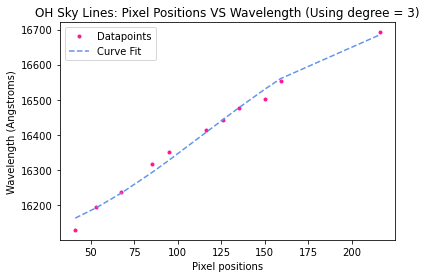

In [154]:
# Line Fitting: Degree 3 (Cubic)

# Plot Wavelength VS Pixel
plt.plot(x1,y1, '.', label = 'Datapoints', color='deeppink')
plt.xlabel('Pixel positions')
plt.ylabel('Wavelength (Angstroms)')
plt.title('OH Sky Lines: Pixel Positions VS Wavelength (Using degree = 3)')

# Curve fitting
# Equations:
def cubed(x_3, a1, b1, c1, d1):
    return (((a1)*x_3**3)+((b1)*x_3**2)+((c1)**x_3)+(d1))

# Curve Fitting 
popt2, pcov2 = curve_fit(cubed, x1, y1, absolute_sigma=True)
pstd2 = np.sqrt(np.diag(pcov2))

print(popt2)
print(pcov2)
print(pstd2)
plt.plot(x1, cubed(x1, popt2[0], popt2[1], popt2[2], popt2[3]), '--', color='cornflowerblue', label='Curve Fit')
plt.legend()

In [171]:
## Error Propagation
# Degree 1
err1 = np.sqrt((1/(N-2))*(np.sum((y1-(deg1[0]*x1+deg1[1]))**2)))
print(err1)

# Degree 2
err2 = np.sqrt((1/(N-3))*(np.sum((y1 - (deg2[0]*(x1**2)+deg2[1]*x1+deg2[2]))**2)))
print(err2)

# Degree 3
err3 = np.sqrt((1/(N-4))*(np.sum((y1 - (deg3[0]*(x1**3)+deg3[1]*(x1**2)+deg3[2]*x1+deg3[3]))**2)))
print(err3)

18.96656799988576
9.616801958783416
9.121961883721017


In [156]:
# Uncertainties:

# Degree 1:
N = len(x1)
err1 = (1/9)*((np.sum(y1 - (deg1[0]*x1+deg1[1])))**2)
print(err1)

# Degree 2:
err2 = (1/8)*((np.sum(y1-(((deg2[0])*(x1**2))+((deg2[1])*x1)+(deg2[2]))))**2)
print(err2)

# Degree 3:
err3 = (1/7)*((np.sum(y1-(((deg3[0])*(x1**3))+((deg3[1])*x1**2)+((deg3[2])*x1)+(deg3[3]))))**2)
print(err3)

6.21304548984274e-23
4.1359030627651384e-23
1.0890423607555289e-21


## Part 4: Finding Centroid of Fe emission

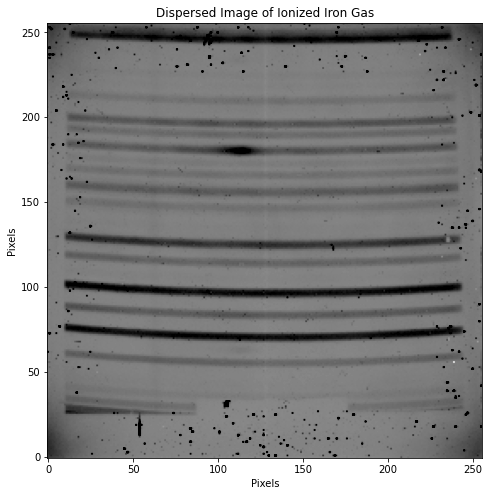

In [157]:
plt.figure(figsize=(8, 8))
plt.imshow(img_2D, origin='lower', vmax=np.percentile(img_2D, 99), cmap="binary")
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.title('Dispersed Image of Ionized Iron Gas')
plt.show()

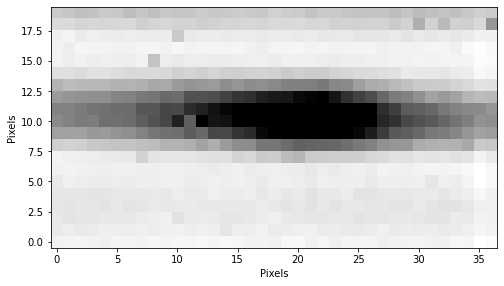

In [158]:
# Select Fe emission area
plt.figure(figsize=(8, 8))
plt.imshow(img_2D[170:190,93:130], origin='lower', vmax=np.percentile(img_2D, 99), cmap="binary")
plt.xlabel('Pixels')
plt.ylabel('Pixels')
plt.show()
plt.show()

Text(0.5, 1.0, 'OH Sky Lines: Pixel VS Intensity')

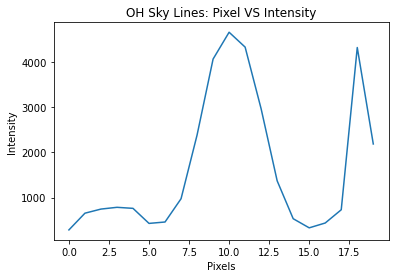

In [159]:
snippet1 = img_2D[170:190,129:130]
plt.plot(snippet1)
plt.xlabel('Pixels')
plt.ylabel('Intensity')
plt.title('OH Sky Lines: Pixel VS Intensity')

In [168]:
# Creating function with degree 3 solution

def iron(xval):
    return (deg3[0])*xval**3 + (deg3[1])*xval**2 +  (deg3[2])*xval + deg3[3]

wavelength = iron(10)
print(wavelength)

15974.546869418744


In [187]:
# using Doppler Eq: lambda - lambda_0 / lambda_0 = v / c
# Where lambda_0 = 1.6439981 micrometers = 16439.981 angstroms

# Rearrange for v: c * (lambda - lambda_o / lambda_o) = v

#converting wavelength from angstrom to meters: 15974.546869418744 == 1.597454686941874491e-6
#converting wavelength from angstrom to meters: 16439.981 == 1.6439981e-6

def velocity(c, lam, lam0):
    return c*((lam-lam0)/lam0)

print('The velocity of the emission is:', velocity(3e8, 1.597454686941874491e-6, 1.6439981e-6),'meters/second')

#Converting 
# speed = 8493.3333666490470932 km/s

The velocity of the emission is: -8493333.366649047 meters/second


In [191]:
#Max wavelength:
def ironmax(xvalue):
    return (deg3[0]+unc3[0])*(xvalue**3)+(deg3[1]+unc3[1])*(xvalue**2)+(deg3[2]+unc3[2])*xvalue+(deg3[3]+unc3[3])

#Min wavelength:
def ironmin(xvalue):
    return (deg3[0]-unc3[0])*(xvalue**3)+(deg3[1]-unc3[1])*(xvalue**2)+(deg3[2]-unc3[2])*xvalue+(deg3[3]-unc3[3])

print('max wave:', ironmax(10))
print('min wave:', ironmin(10))

#converting angstrom to meters
# max = 1.602139941736072924e-6
# min = 1.592769432147676269e-6

max wave: 16021.399417360728
min wave: 15927.694321476762
